## Target Guided Encoding

- Capture valuable information while encoding 
- Ordering according to the target variable 
- Imputing using the probability of target variable 
- Using weight of evidence 

### Monotonicity and its implications in Target Guided Encoding

A monotonic relationship either:

- Increases the value of one variable with the increase in the value of the other variable 

- Decreases the value of one variable with the increase in the value of the other variable 

The target guided encoding methods assume a monotonic relationship.

### Pros

- Capture information 
- Do not expand feature space

### Cons

- Might cause overfitting


### Ordinal target guided encoding 

- Numbers taken from the target variables 

- Calculate the mean of target variable for the category

- Sort the labels by this mean target value 

- Assign a number 



In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [171]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [174]:
data = data.drop(['Name'], axis=1)

In [175]:
# Get variables with more than n categories 
n = 10
cats = []
for col in data.columns:
    if data[col].dtypes =='O': 
        if len(data[col].unique())>n: 
            print('{} categories : {} '.format(col, len(data[col].unique())))
            cats.append(col)

Ticket categories : 681 
Cabin categories : 148 


In [176]:
data = data[cats+['Survived']]

In [177]:
for col in cats:
  print("{} unique categories : {}".format(col,len(data[col].unique())))

Ticket unique categories : 681
Cabin unique categories : 148


In [178]:
for col in cats:
  print("{} Missing : {}".format(col,data[col].isnull().sum()))

Ticket Missing : 0
Cabin Missing : 687


In [179]:
data.head()

,Ticket,Cabin,Survived
0,A/5 21171,NaN,0
1,PC 17599,C85,1
2,STON/O2. 3101282,NaN,1
3,113803,C123,1
4,373450,NaN,0


In [180]:
for col in cats:
  data[col].fillna('MissingData', inplace=True)

In [181]:
data.head()

,Ticket,Cabin,Survived
0,A/5 21171,MissingData,0
1,PC 17599,C85,1
2,STON/O2. 3101282,MissingData,1
3,113803,C123,1
4,373450,MissingData,0


In [182]:
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Ticket,Cabin,Survived
0,A/5 21171,M,0
1,PC 17599,C,1
2,STON/O2. 3101282,M,1
3,113803,C,1
4,373450,M,0


In [183]:
for col in cats:
  print("{} unique categories : {}".format(col,len(data[col].unique())))

Ticket unique categories : 681
Cabin unique categories : 9


In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[cats], data['Survived'],
                                                    test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [185]:
def tg_ordinal(Xtrain, Xtest, y_train, columns):
  X_train, X_test = Xtrain.copy(), Xtest.copy()
  _temp = pd.concat([X_train, y_train], axis=1)
  for col in columns:
    ordered = _temp.groupby([col])[y_train.name].mean().sort_values().index
    mapper = {k:i for i, k in enumerate(ordered, 0)} 
    X_train[col] = X_train[col].map(mapper)
    X_test[col] = X_test[col].map(mapper)
  return X_train, X_test, mapper

In [186]:
X_train_encoded, X_test_encoded, mapper = tg_ordinal(X_train, X_test, y_train, ['Cabin'])

In [187]:
X_train.head()

,Ticket,Cabin
750,29103,M
666,234686,M
858,2666,M
349,315088,M
615,220845,M


In [188]:
X_train_encoded.head()

,Ticket,Cabin
750,29103,1
666,234686,1
858,2666,1
349,315088,1
615,220845,1


In [189]:
mapper

{'A': 3, 'B': 6, 'C': 5, 'D': 8, 'E': 7, 'F': 4, 'G': 2, 'M': 1, 'T': 0}

In [194]:
X_train[col].value_counts()

M    549
C     48
B     39
D     27
E     25
A     13
F      7
G      3
T      1
Name: Cabin, dtype: int64

In [211]:
sns.set()
# Explore Monotony
def monotony_plot(X_train, X_train_encoded, y_train, columns):
  for col in columns:
    fig = plt.figure()
    _temp = pd.concat([X_train, y_train], axis=1)
    fig = _temp.groupby([col])[y_train.name].mean().plot()
    fig.set_title('Unprocessed')
    fig = plt.figure()
    _temp = pd.concat([X_train_encoded, y_train], axis=1)
    fig = _temp.groupby([col])[y_train.name].mean().plot()
    fig.set_title('Processed')


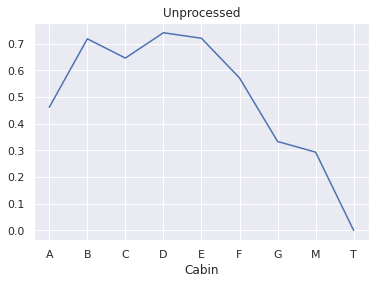

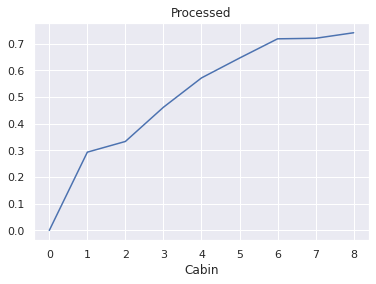

In [212]:
monotony_plot(X_train, X_train_encoded, y_train, ['Cabin'])